# MNIST dataset

Numpy 를 가지고 dataset 을 한번 만져보도록 하겠습니다.. 그 유명한 Yann Lecun 교수가 무려 90년대 초반에 만들었던 Neural Net 이였던 LeNet 에 사용되었던 dataset 입니다.  0 에서 9 까지의 사람손글씨 데이터셋인데요.

1993 년의 풋풋한 Lecun 교수님의 모습도 확인하실겸 https://www.youtube.com/watch?v=FwFduRA_L6Q 이 동영상 한번 보시지요. 영상속의 사람손글씨들을 모아 놓은 데이터넷이 MNIST dataset 입니다.

dataset 은 yann.lcun.com 에서 다운로드 받으실 수 있는데요.  http://yann.lecun.com/exdb/mnist/ 이 페이지입니다..
자 그럼 한번 데이터셋을 다운로드해보고 Jupyter Notebook (Google Colab) 에서 직접 데이터셋을 한번 살펴보도록 합시다.


In [3]:
import numpy as np
from urllib import request
import gzip



다운로드해야 하는 file 들의 이름을 가지고 URL 을 완성해봅시다. 

In [9]:
filename = [
["x_train", "train-images-idx3-ubyte.gz"],
["x_test", "t10k-images-idx3-ubyte.gz"],
["y_train", "train-labels-idx1-ubyte.gz"],
["y_test", "t10k-labels-idx1-ubyte.gz" ],
]

base_url = "http://yann.lecun.com/exdb/mnist/"

# filename list 에서 하나씩 file 이름들을 가져옵니다. 
for n in filename:
    request.urlretrieve(base_url+n[1],n[1])
    print("%s downloaded " % base_url+n[1])

print("download has been completed.")

http://yann.lecun.com/exdb/mnist/ downloaded train-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloaded t10k-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloaded train-labels-idx1-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloaded t10k-labels-idx1-ubyte.gz
download has been completed.


In [26]:
# dictionary 에 'x_train', 'y_train', 'x_test', 'y_test' 라는 key 로 저장합니다.
mnist = {}

# train, test image 를 가져와서 dictionary 에 넣습니다.  x_train, y_train 에 넣습니다. 
for name in filename[:2]:
    with gzip.open(name[1], 'rb') as f:
        mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28,28)
        
for name in filename[2:]:
    with gzip.open(name[1], 'rb') as f:
        mnist[name[0]] = np.frombuffer(f.read(),np.uint8, offset=8).reshape(-1,1)

In [27]:
# training data, label 의 shape 을 살펴봅시다. 
print(mnist['x_train'].shape)
print(mnist['y_train'].shape)


(60000, 28, 28)
(60000, 1)


In [28]:
# test data, label 의 shape 을 살펴볼까요?
print(mnist['x_test'].shape)
print(mnist['y_test'].shape)

(10000, 28, 28)
(10000, 1)


Training data,label 이 60000 장, 그리고 Test data, label 의 갯수가 10000장이 있는 것을 확인할 수 있습니다.

그럼 dataset 이 제대로 들어와 있는지 한번 확인해볼까요?

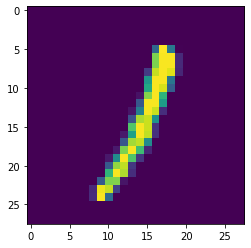

In [30]:
import matplotlib.pyplot as plt

# 100 번째 index 에 들어있는 데이터를 한번 출력해봅시다. 
img = mnist['x_train'][99,:]
plt.imshow(img)
plt.show()

28x28 pixel 로 표현되어 있네요. 몇번을 나타내는 것 같으신가요?
한번, label 이 몇번으로 표현되어 있는지 한번 볼까요? 

In [32]:
print(mnist['y_train'][99])

[1]


네 1 이라고 제대로 표현되는 것 같습니다. 


그럼 6000 번째 데이터는 어떤 숫자일까요?

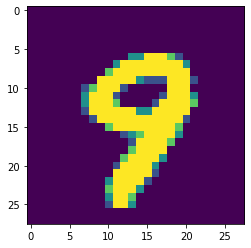

In [33]:

# 왜 5999 인지는 아시겠죠?
img = mnist['x_train'][5999,:]
plt.imshow(img)
plt.show()

In [34]:
# label 이 제대로 박혀 있는지 한번 볼까요?

print(mnist['y_train'][5999])

[9]


제대로 나오네요.. 자 그럼 이제 연습문제 한번 풀어보도록 합시다.
dictionary 를 손쉽게 억세스 하기 위해서 변수들을 좀더 쉽게 만들어 볼까요?




In [35]:
x_train, y_train, x_test, y_test = mnist['x_train'], mnist['y_train'], mnist['x_test'], mnist['y_test']

## 연습문제 1

In [40]:
# 연습문제 1. (pyplot)
# x_train data 로부터 i 번째에서부터 시작하는 이미지를 10 개를 동시에 출력해 봅시다.
# 

def draw_10_images(i):
    images = xtrain[i:i+10]
    # 아래에 pyplot 을 이용해서 코드를 작성해보세요. ( cf. subplot 을 배웠지요? )

## 연습문제 2

In [42]:
# 연습문제 2. x_train 에서 각각의 0, 1, 2, ..., 9 각각의 데이터셋은 몇개씩이나 있을까요?

# your code here 




# (hint) numpy 의 condition operator 를 지난 자료에서 알려드렸습니다. 
# y_train == 8

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

## 연습문제 3

In [43]:
# 연습문제 3. 0~9 까지를 분류하는 multi-class classification 은 pytorch 를 이용해서 매우 손쉽게 풀어볼 예정이구요. 학습을 위해서 0,1 숫자 두개는 특별히 분류해서 numpy 를 이용해서 직접 logistic regression 을 돌려볼려고 합니다. 0,1 만 존재하는 x_train, y_train, x_test, y_test 를 만들어 보도록 합시다. 